In [93]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'a490fec0-4db7-4cb7-89cb-600177d29c43',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-01-26T03:13:28.599Z', 'error_code': 0, 'error_message': None, 'elapsed': 33, 'credit_count': 1, 'notice': None, 'total_count': 10747}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11878, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [95]:
type(data)

dict

In [97]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [99]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11878,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19815131.00000,19815131.00000,False,NaN,1,None,None,None,2025-01-26T03:11:00.000Z,104723.27705,22194703711.21672,-55.72770,0.20153,0.18916,0.20447,8.90565,12.84608,54.34689,2075105453535.70947,57.63990,2199188818093.10010,None,2025-01-26T03:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 22:13:37.565624
1,1027,Ethereum,ETH,ethereum,9896,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120508314.25648,120508314.25648,True,NaN,2,None,None,None,2025-01-26T03:12:00.000Z,3328.42576,12600113816.65675,-48.84800,0.21439,1.06100,-0.45629,-1.03680,-1.08234,33.64298,401102977899.01678,11.14140,401102977899.02002,None,2025-01-26T03:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 22:13:37.565624
2,52,XRP,XRP,xrp,1517,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,57641211234.00000,99986586496.00000,False,NaN,3,None,None,None,2025-01-26T03:12:00.000Z,3.12272,3076073627.07781,-52.15890,0.07958,0.18446,-3.93384,44.29318,127.50093,506.91226,179997320554.65576,4.99980,312271926111.92999,None,2025-01-26T03:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 22:13:37.565624
3,825,Tether USDt,USDT,tether,114723,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,139329876218.59555,141572991338.46188,True,NaN,4,None,None,None,2025-01-26T03:12:00.000Z,0.99985,61954156494.67049,-39.89940,0.00496,-0.00040,0.07500,0.12134,0.03053,0.11493,139309274551.16913,3.86960,141552057998.37000,None,2025-01-26T03:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-25 22:13:37.565624
4,5426,Solana,SOL,solana,832,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,486612563.11849,592770647.33749,True,NaN,5,None,None,None,2025-01-26T03:12:00.000Z,255.94871,4654649829.83743,-37.25950,0.80883,2.34708,1.35689,35.53908,9.70298,45.80576,124547857130.00551,3.45950,151718881695.76999,None,2025-01-26T03:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 22:13:37.565624
5,1839,BNB,BNB,bnb,2344,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142480994.68000,142480994.68000,False,NaN,6,None,None,None,2025-01-26T03:12:00.000Z,688.73796,1443056356.78212,-15.38210,0.01664,0.88434,-3.01568,-0.10643,11.64805,17.05219,98132069020.72580,2.72580,98132069020.73000,None,2025-01-26T03:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 22:13:37.565624
6,74,Dogecoin,DOGE,dogecoin,1156,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147777506383.70520,147777506383.70520,True,NaN,7,None,None,None,2025-01-26T03:12:00.000Z,0.35408,1393474274.74575,-32.54740,0.30028,1.21135,-12.44533,12.83375,-9.12152,142.95555,52325315946.58154,1.45340,52325315946.58000,None,2025-01-26T03:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 22:13:37.565624
7,3408,USDC,USDC,usd-coin,25177,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,52179332430.53584,52179332430.53584,False,NaN,8,None,None,None,2025-01-26T03:12:00.000Z,1.00003,6804090091.83824,-30.54200,0.01309,0.01427,0.00588,0.00645,0.00786,0.01321,52180962417.69770,1.44940,52180962417.70000,None,2025-01-26T03:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b8699

In [101]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'a490fec0-4db7-4cb7-89cb-600177d29c43',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\zeezg\Desktop\Analyst Portfolio\APIpull.csv'):
        df.to_csv(r'C:\Users\zeezg\Desktop\Analyst Portfolio\APIpull.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\zeezg\Desktop\Analyst Portfolio\APIpull.csv', mode='a', header=False)

        

In [ ]:
import os
from time import time
from time import sleep

for i in range(100):
    api_runner()
    print('API Runner completed')
    sleep(60)
exit()


{'status': {'timestamp': '2025-01-26T03:13:47.347Z', 'error_code': 0, 'error_message': None, 'elapsed': 14, 'credit_count': 1, 'notice': None, 'total_count': 10747}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11878, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [104]:
df72 = pd.read_csv(r'C:\Users\zeezg\Desktop\Analyst Portfolio\APIpull.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11878,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19815115.00000,19815115.00000,False,NaN,1,NaN,NaN,NaN,2025-01-26T02:16:00.000Z,104584.47273,22429952232.90804,-56.31680,-0.00171,-0.13849,-0.13814,8.78521,13.24507,54.58801,2072353354418.75293,57.68560,2196273927392.98999,NaN,2025-01-26T02:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 21:18:07.353466
1,1,1027,Ethereum,ETH,ethereum,9896,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120508314.25648,120508314.25648,True,NaN,2,NaN,NaN,NaN,2025-01-26T02:17:00.000Z,3326.42518,12589754265.02275,-49.86980,0.00506,0.75100,-0.61405,-1.33924,0.17147,33.54320,400861890419.13330,11.15700,400861890419.13000,NaN,2025-01-26T02:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 21:18:07.353466
2,2,52,XRP,XRP,xrp,1517,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,57641211234.00000,99986586496.00000,False,NaN,3,NaN,NaN,NaN,2025-01-26T02:17:00.000Z,3.11947,3091888286.18765,-53.97720,-0.07474,0.00624,-4.72023,43.27846,126.77417,506.62331,179809948663.62073,5.00610,311946860265.77002,NaN,2025-01-26T02:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 21:18:07.353466
3,3,825,Tether USDt,USDT,tether,114722,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'eth...",NaN,139329876218.59555,141572991338.46188,True,NaN,4,NaN,NaN,NaN,2025-01-26T02:17:00.000Z,0.99981,62240322316.59578,-40.69750,-0.00406,0.01143,0.07550,0.12532,0.01821,0.11342,139303535920.51337,3.87720,141546226979.70999,NaN,2025-01-26T02:17:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-25 21:18:07.353466
4,4,5426,Solana,SOL,solana,832,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,486617531.64990,592771564.07575,True,NaN,5,NaN,NaN,NaN,2025-01-26T02:17:00.000Z,254.29609,4707875749.78040,-37.52270,-0.75992,0.84855,-1.22139,34.07632,10.38421,44.64282,123744935322.71638,3.44410,150739490640.62000,NaN,2025-01-26T02:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 21:18:07.353466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,10,1975,Chainlink,LINK,chainlink,1922,2017-09-20T00:00:00.000Z,"['platform', 'defi', 'oracles', 'smart-contrac...",NaN,638099970.45279,1000000000.00000,False,NaN,11,NaN,NaN,NaN,2025-01-26T03:17:00.000Z,25.27042,412334997.94561,-43.08040,1.03095,0.96475,4.95100,10.41603,45.23505,132.15423,16125051281.62225,0.44790,25270415339.75000,NaN,2025-01-26T03:17:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2025-01-25 22:17:46.221379
311,11,5805,Avalanche,AVAX,avalanche,853,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",715748719.00000,411587821.46001,449924121.46001,False,NaN,12,NaN,NaN,NaN,2025-01-26T03:17:00.000Z,37.12572,590008517.17615,-3.67030,0.27051,4.46801,-6.43310,-0.70616,-13.34860,45.95389,15280494936.75331,0.42440,26572687787.19000,NaN,2025-01-26T03:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 22:17:46.221379
312,12,4642,Hedera,HBAR,hedera,309,2019-09-17T00:00:00.000Z,"['dag', 'marketplace', 'enterprise-solutions',...",50000000000.00000,38267523240.46764,500000000

In [106]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11878,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19815131.00000,19815131.00000,False,NaN,1,None,None,None,2025-01-26T03:16:00.000Z,104726.99802,22172142028.92588,-55.74370,0.13628,0.24588,0.18602,8.95568,12.78730,54.43132,2075179185100.47534,57.64190,2199266958523.25977,None,2025-01-26T03:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 22:17:46.221379
1,1027,Ethereum,ETH,ethereum,9896,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120508314.25648,120508314.25648,True,NaN,2,None,None,None,2025-01-26T03:17:00.000Z,3326.92920,12603087987.67093,-48.74800,0.01515,0.93391,-0.55783,-1.01154,-1.02352,33.72300,400922628958.45386,11.13680,400922628958.45001,None,2025-01-26T03:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 22:17:46.221379
2,52,XRP,XRP,xrp,1517,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,57641211234.00000,99986586496.00000,False,NaN,3,None,None,None,2025-01-26T03:17:00.000Z,3.12617,3079003664.74129,-52.00120,0.21475,0.23221,-3.64355,44.41513,127.83727,507.93656,180196085089.66553,5.00530,312616756712.72998,None,2025-01-26T03:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 22:17:46.221379
3,825,Tether USDt,USDT,tether,114723,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,139329876218.59555,141572991338.46188,True,NaN,4,None,None,None,2025-01-26T03:16:00.000Z,0.99978,61857212511.84688,-40.01090,0.00075,-0.00257,0.06401,0.10752,0.00120,0.09444,139299377950.48383,3.86940,141542002069.22000,None,2025-01-26T03:16:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-25 22:17:46.221379
4,5426,Solana,SOL,solana,832,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,486612563.11849,592770647.33749,True,NaN,5,None,None,None,2025-01-26T03:16:00.000Z,256.87523,4673790364.42730,-36.98390,1.02597,2.70072,1.55335,36.00942,10.11554,46.29189,124998713378.62442,3.47210,152268095527.48999,None,2025-01-26T03:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 22:17:46.221379
5,1839,BNB,BNB,bnb,2344,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142480994.68000,142480994.68000,False,NaN,6,None,None,None,2025-01-26T03:17:00.000Z,688.74430,1446406755.35289,-15.31410,0.01627,0.80243,-2.91399,-0.10153,11.66639,17.10221,98132972537.39893,2.72580,98132972537.39999,None,2025-01-26T03:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 22:17:46.221379
6,74,Dogecoin,DOGE,dogecoin,1156,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147777506383.70520,147777506383.70520,True,NaN,7,None,None,None,2025-01-26T03:17:00.000Z,0.35410,1393694222.95930,-32.44610,0.23659,1.19334,-12.29252,12.78680,-9.05000,144.00325,52328210819.97688,1.45360,52328210819.98000,None,2025-01-26T03:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 22:17:46.221379
7,3408,USDC,USDC,usd-coin,25177,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,52179332430.53584,52179332430.53584,False,NaN,8,None,None,None,2025-01-26T03:17:00.000Z,0.99995,6817765782.01837,-30.35200,0.00343,-0.00568,-0.01296,-0.01129,0.01281,-0.00747,52176613576.30637,1.44940,52176613576.31000,None,2025-01-26T03:17:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0

In [10]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [89]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11878,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19815115.00000,19815115.00000,False,NaN,1,None,None,None,2025-01-26T02:16:00.000Z,104584.47273,22429952232.90804,-56.31680,-0.00171,-0.13849,-0.13814,8.78521,13.24507,54.58801,2072353354418.75293,57.68560,2196273927392.98999,None,2025-01-26T02:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 21:18:07.353466
1,1027,Ethereum,ETH,ethereum,9896,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120508314.25648,120508314.25648,True,NaN,2,None,None,None,2025-01-26T02:17:00.000Z,3326.42518,12589754265.02275,-49.86980,0.00506,0.75100,-0.61405,-1.33924,0.17147,33.54320,400861890419.13330,11.15700,400861890419.13000,None,2025-01-26T02:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 21:18:07.353466
2,52,XRP,XRP,xrp,1517,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,57641211234.00000,99986586496.00000,False,NaN,3,None,None,None,2025-01-26T02:17:00.000Z,3.11947,3091888286.18765,-53.97720,-0.07474,0.00624,-4.72023,43.27846,126.77417,506.62331,179809948663.62073,5.00610,311946860265.77002,None,2025-01-26T02:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 21:18:07.353466
3,825,Tether USDt,USDT,tether,114722,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,139329876218.59555,141572991338.46188,True,NaN,4,None,None,None,2025-01-26T02:17:00.000Z,0.99981,62240322316.59578,-40.69750,-0.00406,0.01143,0.07550,0.12532,0.01821,0.11342,139303535920.51337,3.87720,141546226979.70999,None,2025-01-26T02:17:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-25 21:18:07.353466
4,5426,Solana,SOL,solana,832,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,486617531.64990,592771564.07575,True,NaN,5,None,None,None,2025-01-26T02:17:00.000Z,254.29609,4707875749.78040,-37.52270,-0.75992,0.84855,-1.22139,34.07632,10.38421,44.64282,123744935322.71638,3.44410,150739490640.62000,None,2025-01-26T02:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 21:18:07.353466
5,1839,BNB,BNB,bnb,2344,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142480996.29000,142480996.29000,False,NaN,6,None,None,None,2025-01-26T02:17:00.000Z,688.63227,1445026630.26005,-16.39880,-0.03868,0.84904,-3.36513,-0.44183,12.47062,17.23485,98117011664.08917,2.73170,98117011664.09000,None,2025-01-26T02:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 21:18:07.353466
6,74,Dogecoin,DOGE,dogecoin,1156,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147777026383.70526,147777026383.70526,True,NaN,7,None,None,None,2025-01-26T02:17:00.000Z,0.35327,1398971000.86166,-34.31770,-0.36378,0.90814,-12.74999,12.06834,-8.80593,147.04166,52204530403.61859,1.45300,52204530403.62000,None,2025-01-26T02:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-25 21:18:07.353466
7,3408,USDC,USDC,usd-coin,25177,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,52183307679.55824,52183307679.55824,False,NaN,8,None,None,None,2025-01-26T02:17:00.000Z,0.99991,6606059056.10835,-33.84760,-0.00692,0.01044,-0.01288,-0.00796,-0.00838,-0.00069,52178797842.87873,1.45230,52178797842.88000,None,2025-01-26T02:17:00.000Z,1027.00000,Ethereum,ETH,ether

In [108]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.13628,0.24588,0.18602,8.95568,12.78730,54.43132
Ethereum,0.01515,0.93391,-0.55783,-1.01154,-1.02352,33.72300
XRP,0.21475,0.23221,-3.64355,44.41513,127.83727,507.93656
Tether USDt,0.00075,-0.00257,0.06401,0.10752,0.00120,0.09444
Solana,1.02597,2.70072,1.55335,36.00942,10.11554,46.29189
BNB,0.01627,0.80243,-2.91399,-0.10153,11.66639,17.10221
Dogecoin,0.23659,1.19334,-12.29252,12.78680,-9.05000,144.00325
USDC,0.00343,-0.00568,-0.01296,-0.01129,0.01281,-0.00747
Cardano,0.23094,0.17679,-11.72596,12.98183,3.07799,190.55277


In [16]:
df4 = df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h     -0.00171
         quote.USD.percent_change_24h    -0.13849
         quote.USD.percent_change_7d     -0.13814
         quote.USD.percent_change_30d     8.78521
         quote.USD.percent_change_60d    13.24507
                                           ...   
Toncoin  quote.USD.percent_change_24h     0.86212
         quote.USD.percent_change_7d     -4.62605
         quote.USD.percent_change_30d   -11.57503
         quote.USD.percent_change_60d   -17.87241
         quote.USD.percent_change_90d     2.60051
Length: 90, dtype: float64

In [114]:
df5 = df4.to_frame(name='values')
df5

values
name                                          
Bitcoin quote.USD.percent_change_1h   -0.00171
        quote.USD.percent_change_24h  -0.13849
        quote.USD.percent_change_7d   -0.13814
        quote.USD.percent_change_30d   8.78521
        quote.USD.percent_change_60d  13.24507
...                                        ...
Toncoin quote.USD.percent_change_24h   0.86212
        quote.USD.percent_change_7d   -4.62605
        quote.USD.percent_change_30d -11.57503
        quote.USD.percent_change_60d -17.87241
        quote.USD.percent_change_90d   2.60051

[90 rows x 1 columns]

In [116]:
df5.count()

values    90
dtype: int64

In [118]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.00171
1,Bitcoin,quote.USD.percent_change_24h,-0.13849
2,Bitcoin,quote.USD.percent_change_7d,-0.13814
3,Bitcoin,quote.USD.percent_change_30d,8.78521
4,Bitcoin,quote.USD.percent_change_60d,13.24507
...,...,...,...
85,Toncoin,quote.USD.percent_change_24h,0.86212
86,Toncoin,quote.USD.percent_change_7d,-4.62605
87,Toncoin,quote.USD.percent_change_30d,-11.57503
88,Toncoin,quote.USD.percent_change_60d,-17.87241


In [120]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.00171
1,Bitcoin,quote.USD.percent_change_24h,-0.13849
2,Bitcoin,quote.USD.percent_change_7d,-0.13814
3,Bitcoin,quote.USD.percent_change_30d,8.78521
4,Bitcoin,quote.USD.percent_change_60d,13.24507
...,...,...,...
85,Toncoin,quote.USD.percent_change_24h,0.86212
86,Toncoin,quote.USD.percent_change_7d,-4.62605
87,Toncoin,quote.USD.percent_change_30d,-11.57503
88,Toncoin,quote.USD.percent_change_60d,-17.87241


In [122]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1hr', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1hr,-0.00171
1,Bitcoin,24h,-0.13849
2,Bitcoin,7d,-0.13814
3,Bitcoin,30d,8.78521
4,Bitcoin,60d,13.24507
...,...,...,...
85,Toncoin,24h,0.86212
86,Toncoin,7d,-4.62605
87,Toncoin,30d,-11.57503
88,Toncoin,60d,-17.87241


In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

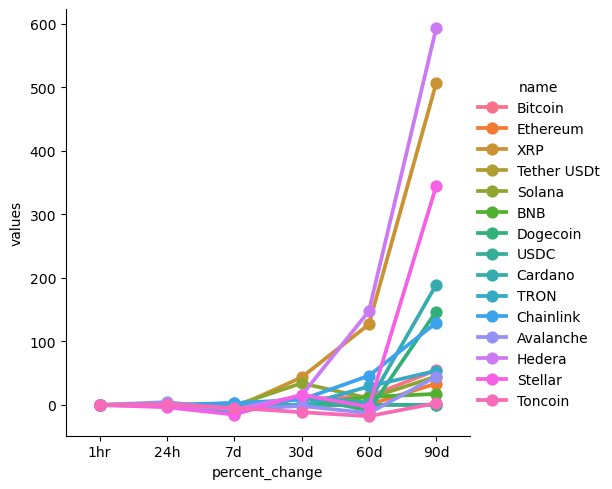

In [126]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [130]:
df10 = df[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,104726.99802,2025-01-25 22:17:46.221379


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

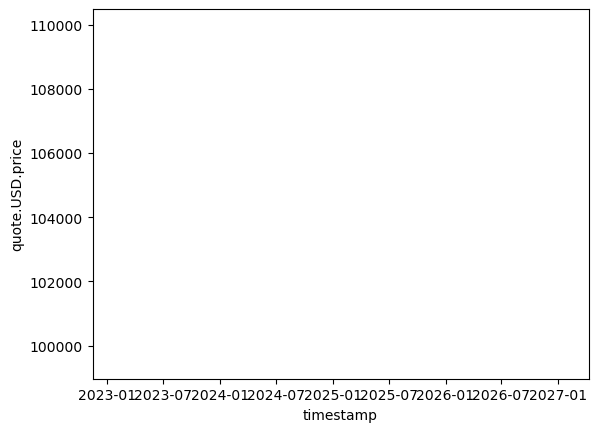

In [132]:
sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)